# Exploratory Data Analysis

The purpose of this notebook is to perform exploratory data analysis on the datasets to understand more about the nature of the data given and perform some preliminary cleaning.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# will read the files from drive so we don't have to reupload with every runtime
# from google.colab import drive
# drive.mount('/content/drive')

amazon = pd.read_csv("amazon_clothing_reviews.csv")
print(amazon.shape)
amazon.head()


(6525, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The data dimensions are 6525 x 11, so there are 6525 observations of 11
variables.



In [ ]:
fashion_nova = pd.read_csv('fashionnova_reviews.csv')
print(fashion_nova.shape)
fashion_nova.head()

(131980, 9)


,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [ ]:
# count how many NA (null) values there are for each of the three columns: title, rating, and review text
print(sum(amazon['Review Text'].isna()))
print(sum(amazon['Title'].isna()))
print(sum(amazon['Rating'].isna()))

print(sum(fashion_nova['Review Text'].isna()))
print(sum(fashion_nova['Review Title'].isna()))
print(sum(fashion_nova['Rating'].isna()))

229
1068
0
0
48
0


Text(0.5, 1.0, 'Distribution of Amazon Ratings')

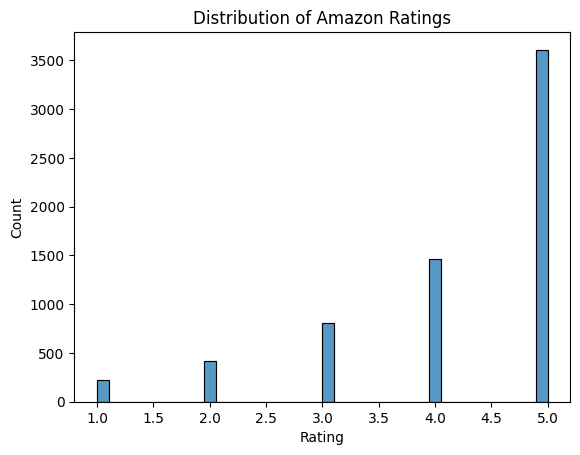

In [ ]:
# plot the distribution of numeric ratings given
sns.histplot(amazon['Rating'])
plt.title('Distribution of Amazon Ratings')

In [ ]:
# view example record in data set
fashion_nova.iloc[0]

,0
Reviewer Name,Champagne
Profile Link,/users/66c78240087b6269ffbcb5fb
Country,US
Review Count,1 review
Review Date,2024-08-22T20:24:02.000Z
Rating,Rated 5 out of 5 stars
Review Title,I love ordering from fashion nova
Review Text,I love ordering from fashion nova. The clothes...
Date of Experience,"August 22, 2024"


Text(0.5, 1.0, 'Distribution of Fashion Nova Ratings')

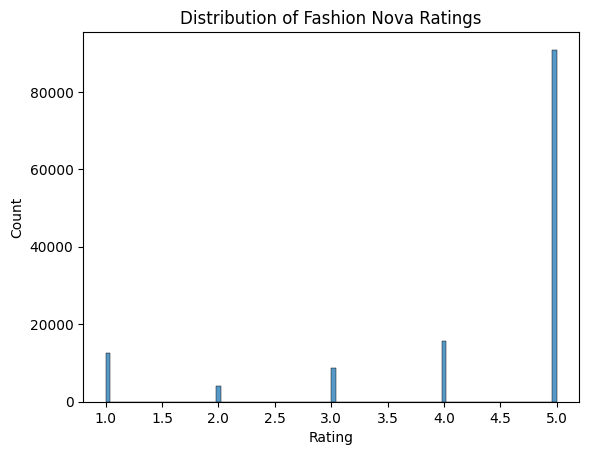

In [ ]:
# cleaning: convert rating column in fashion_nova to extract the numeric value from the string
rating_column = fashion_nova['Rating'].str.extract(r'Rated (\d) out of 5 stars').astype(int)
fashion_nova['Rating'] = rating_column

# plot the distribution of numeric ratings
sns.histplot(fashion_nova['Rating'])
plt.title('Distribution of Fashion Nova Ratings')

In [ ]:
df = pd.DataFrame()
# count how many times the word "shipping" or the word "quality" appear in a review for both brands
df['Fashion Nova_shipping'] = fashion_nova['Review Text'].str.count(r'\bshipping\b')
df['Amazon_shipping'] = amazon['Review Text'].str.count(r'\bshipping\b')
df['Fashion Nova_quality'] = fashion_nova['Review Text'].str.count(r'\bquality\b')
df['Amazon_quality'] = amazon['Review Text'].str.count(r'\bquality\b')

In [ ]:
# print out the number of occurrences for each mention
for column in df.columns:
  print(f"Counts for {column}:")
  print(df[column].value_counts())
  print("\n")


Counts for Fashion Nova_shipping:
Fashion Nova_shipping
0     124276
1       6466
2        921
3        215
4         56
5         27
6         10
7          5
8          2
10         1
9          1
Name: count, dtype: int64


Counts for Amazon_shipping:
Amazon_shipping
0.0    6282
1.0      14
Name: count, dtype: int64


Counts for Fashion Nova_quality:
Fashion Nova_quality
0    123654
1      8071
2       222
3        27
4         4
6         1
5         1
Name: count, dtype: int64


Counts for Amazon_quality:
Amazon_quality
0.0    5707
1.0     564
2.0      23
3.0       2
Name: count, dtype: int64




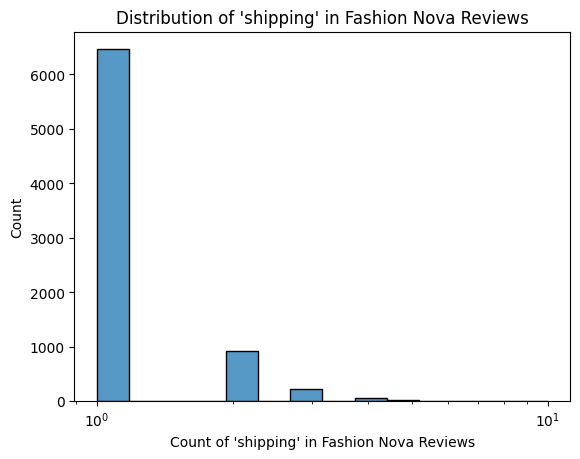

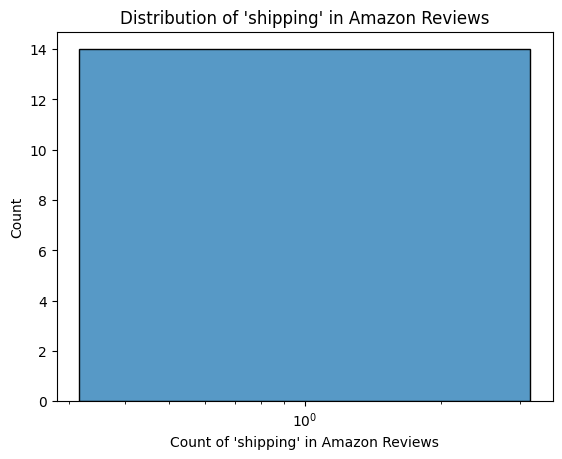

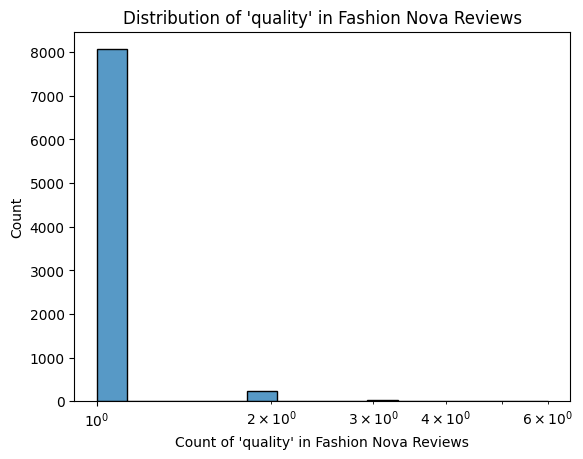

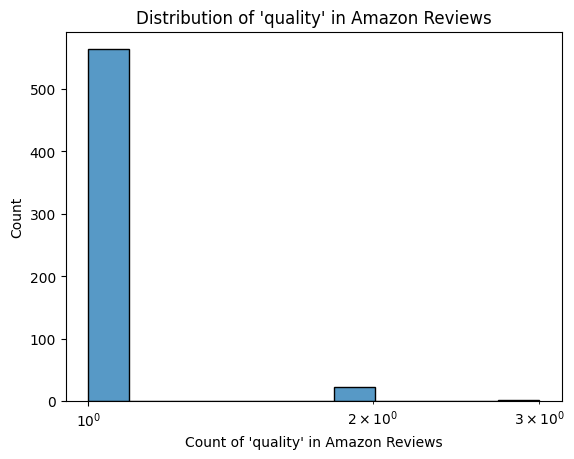

In [ ]:
# graph the counts of mentions (without graphing the reviews that didn't have any mentions of "shipping" nor "quality")
def plot_histogram(df, column):
    sns.histplot(df[column].iloc[1:], log_scale=True)
    col = column.split('_')
    xlab = f"Count of '{col[1]}' in {col[0]} Reviews"
    # print(stri)
    plt.xlabel(xlab)
    tit = f"Distribution of '{col[1]}' in {col[0]} Reviews"
    plt.title(tit)
    plt.show()

for column in df.columns:
  plot_histogram(df, column)
